# Project: Investigate a Dataset (TMDB_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>For the Project Investigate a Dataset I will be Using TMDB movies dataset. 

>This data set contains information about 10 thousand movies collected from The Movie Database (TMDB) between 1960-2015, including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.   

>#### **Questions about the Dataset**
> 1. Movies which had most and least profit
> 2. Movies with largest and lowest budgets
> 3. Movies with most and least earned revenue.
> 4. Movies with longest and shortest runtime values
> 5. Average runtime of all the movies.
> 6. In which year we had most no.of profitable movies.
>----------------------------------------------------------------------
> 7. Successful genres (with respest to the profitable movies).
> 8. Most frequent cast  (with respest to the profitable movies)
> 9. Average budget  (with respest to the profitable movies)
> 10. Average revenue  (with respest to the profitable movies)
> 11. Average duration of the movie  (with respest to the profitable movies)
> 12.Top 20 Production Companies With Higher Number Of Release
> 13.Life Time Profit Earn By Each Production Company
> 14.Top 20 Director Who Directs Maximum Movies



In [1]:
#Import the required libraries/Dependencies
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:

#Load csv FiLe Using Pandas
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> ### Obsevations made on the Dataset
>
>1.) Unit of currency is not mentioned in the Dataset. Taking Dollar as the standard currency.
>
>2.) vote_count is different for the movies, Cannot base popularity of the movies on the average vote count

In [4]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

> **Important Observation for the Dataset Cleaning**
>
> 1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
> 2. Removing the duplicacy in the rows(if any).
> 3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
> 4. Changing release date column into date format.
> 5. Replacing zero with NAN in runtime column.
> 6. Changing format of budget and revenue column.


> **1. Removing Unused columns**
>
> **Columns that we need to delete are**  -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [5]:
#Creating a list of columns to be deleted
del_col=['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline']

#Deleting the columns
tmdb_df= tmdb_df.drop(del_col,axis =1)

In [6]:
#previewing the new dataset
tmdb_df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


> **2. Removing the duplicacy in the rows(if any).**
>
>Lets see how many entries we have in the database

In [7]:
rows, col = tmdb_df.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in TMDB Movie Dataset.'.format(rows-1, col))

There are 10865 total entries of movies and 15 no.of columns in TMDB Movie Dataset.


> Now removing the duplicate rows if any!

In [8]:
tmdb_df.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_df.shape

print('There are now {} total entries of movies and {} no.of columns in TMDB Movie Dataset.'.format(rows-1, col))

There are now 10864 total entries of movies and 15 no.of columns in TMDB Movie Dataset.


> So there was a duplicate row and it has been removed now. 

>**3. Removing 0's from budget and the revenue columns**
>


In [9]:
# Creating a list for just revenue and budget column
rev_bud=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_df[rev_bud] = tmdb_df[rev_bud].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_df.dropna(subset = rev_bud, inplace = True)

rows, col = tmdb_df.shape
print('After removing such entries, we now have only {} no.of movies in TMDB Movie Dataset.'.format(rows-1))

After removing such entries, we now have only 3853 no.of movies in TMDB Movie Dataset.


> **4. Changing the release date column into standard date format**

In [10]:

tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])
#Check
tmdb_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


>**5. Replacing zero with NAN in runtime column.**


In [11]:
#replacing 0 with NaN of runtime column in the dataset
tmdb_df['runtime'] =tmdb_df['runtime'].replace(0, np.NAN)

>**6. Changing format of budget and revenue column.**

In [12]:
#Check Datatypes of the Dataset
tmdb_df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [13]:
change_dtype=['budget', 'revenue']
#changing data type
tmdb_df[change_dtype]=tmdb_df[change_dtype].applymap(np.int64)
#printing the changed information
tmdb_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Movies which had most and least profit

In [14]:
#calculate Profit for each of the movie
#add a new column in the dataframe named 'Profit'
tmdb_df['Profit'] = tmdb_df['revenue'] - tmdb_df['budget']

#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.

def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = tmdb_df[x].idxmin()
    
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = tmdb_df[x].idxmax()
    high = pd.DataFrame(tmdb_df.loc[high_index,:])
    low = pd.DataFrame(tmdb_df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",tmdb_df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",tmdb_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> Column with id 1386(Avatar) shows the highest earned profit i.e 2,544,505,847 Dollars
>
> Whereas the column with id 2244(The Warrior's Way) shows the lowest earned profit i.e 413,912,431 Dollars

### Research Question 2  : Movies with largest and lowest budgets

In [15]:
#Calling find_minmax function for the budget column
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Lost & Found


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


> Column with id 2244(The Warrior's Way) shows the largest budget i.e 425,000,000	dollar.
>
> Whereas the column with id 2618(Lost & Found) shows the smallest budget i.e 1 dollar

### Research Question 3 : Movies with most and least earned revenue

In [16]:
#Calling find_minmax function for the revenue column
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Shattered Glass


,1386,5067
id,19995,13537
popularity,9.432768,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History



>Column with id 1386(Avatar) shows the largest revenue earned i.e 2,781,505,847	 dollar.
>
>Whereas the column with id 5067(Shattered Glass) shows the smallest revenue earned i.e 2 dollar

### Research Question 4 : Movies with longest and shortest runtime

In [18]:
#Calling find_minmax function for the runtime column
find_minmax('runtime')

Movie Which Has Highest runtime :  Carlos
Movie Which Has Lowest runtime  :  Kid's Story


,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


> Column with id 2107(Carlos) shows the longest runtime i.e 338 minutes.
>
> Whereas the column with id 5162(Kid's Story) shows the shortest runtime i.e 15 minutes

### Research Question 5 : Average runtime of the movies from year to year


In [19]:
# Define a function to find the average of a column
def avg_col(column):
    return tmdb_df[column].mean()

In [20]:
#Call the above function
avg_col('runtime')

109.22029060716139

>The Average Runtime  for a movie is 109 minutes.

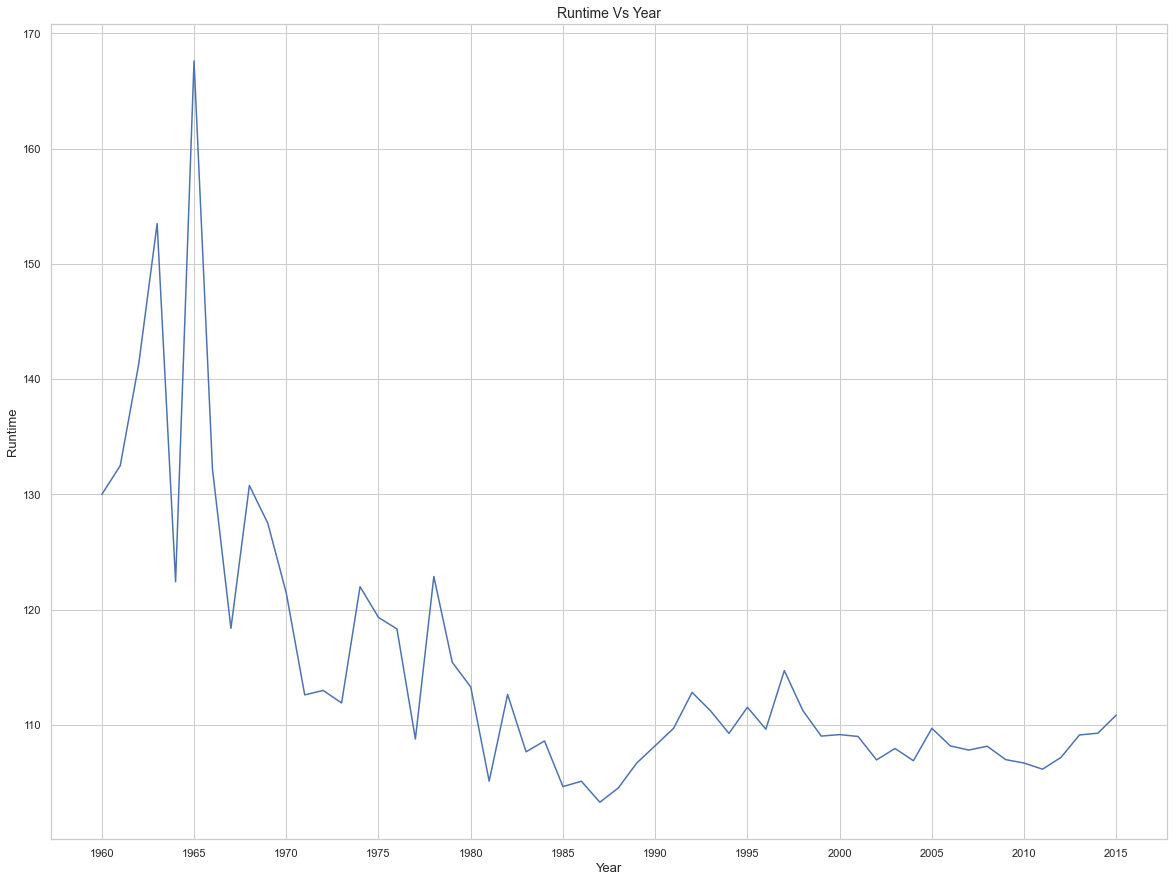

In [22]:
#How the runtime of the movies differ year to year.

#Group the data according to their release_year and find the mean related to this and plot.
tmdb_df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(20,15)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

>According to the plot Movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are around 100 Minutes for Good Engagement of the audience.

### Research Question 6 : Which Year of release was most Profitable?

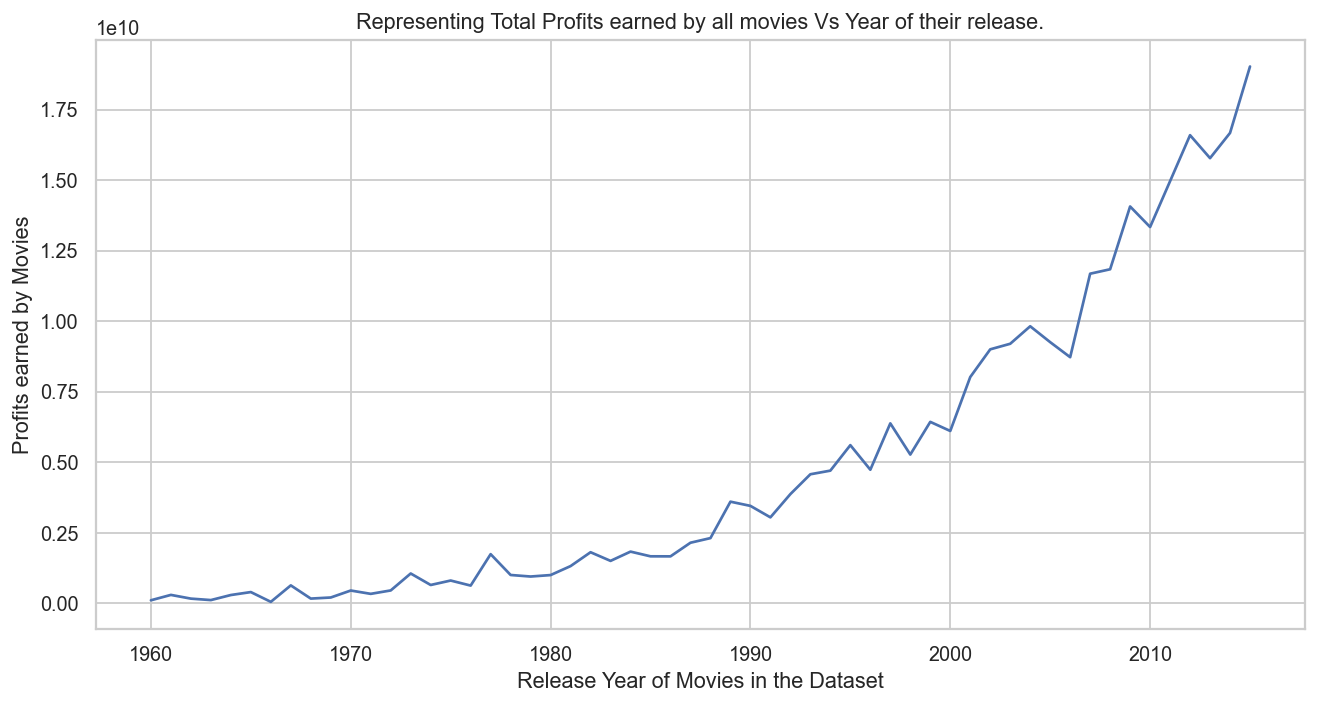

In [23]:
#Using Line plot for the Analysis to know the profits of movies for every year by doing the sum of all movies of a particular year
year_profit = tmdb_df.groupby('release_year')['Profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the Dataset', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(year_profit)

#displaying the line plot
plt.show()

In [24]:
#To find that which year made the highest profit?
year_profit.idxmax()

2015

> We can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit!
>
>Now that we are done with analysing the given Dataset.Let's find the characteristics of profitable movies.



>### For Profitable movies
>
> Before moving further,Cleaning the data again. Considering only movies that have earned a significant amount of profit. 
>
>**Fixing the amount to 50 million dollar.**

In [25]:
#Selecting Movies with profit of $50M or more
profit_data = tmdb_df[tmdb_df['Profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
1,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
2,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
3,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201


In [26]:
#Counting the no.of rows in the new data base
len(profit_data)

1338

> The Dataset is reduced to 1338 from 3853 (in earlier case)

### Research Question 7 : Successful Genres

In [27]:
#Function which will take any column as argument form and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [28]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

> Graphical analysis of the above collected data.

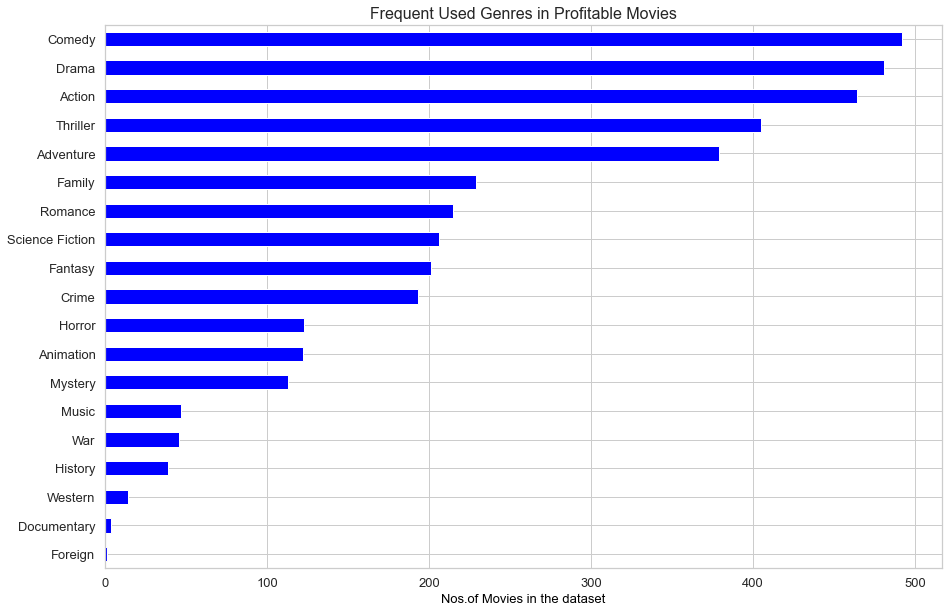

In [37]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = 'blue', fontsize = 13)

#title
lt.set_title(label = 'Frequent Used Genres in Profitable Movies', fontsize ='16')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(15, 10)

#ploting the graph
plt.show()

### Research Question 8 : Most Frequent Cast

>Calling the function **data(column)** again for this analysis.

In [38]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.  

### Research Question 9 : Average Budget of the movies

In [39]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [40]:
# calling the above function for budget
profit_avg('budget')

60444957.76083707

> Movies with profit of 50 million dollar and more have an average budget of 60 million dollar.

### Research Question 10 : Average Revenue earned by the movies


In [41]:
# calling the above function for revenue
profit_avg('revenue')

254957662.59491777

>Movies with profit of 50 million dollar and more have an average revenue of 255 million dollar.

### Research Question 11 : Average duration of the movies

In [42]:
# calling the above function for 
profit_avg('runtime')

113.66741405082212

>So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

### Research Question 12: Top 20 Production Companies With Higher Number Of Release?

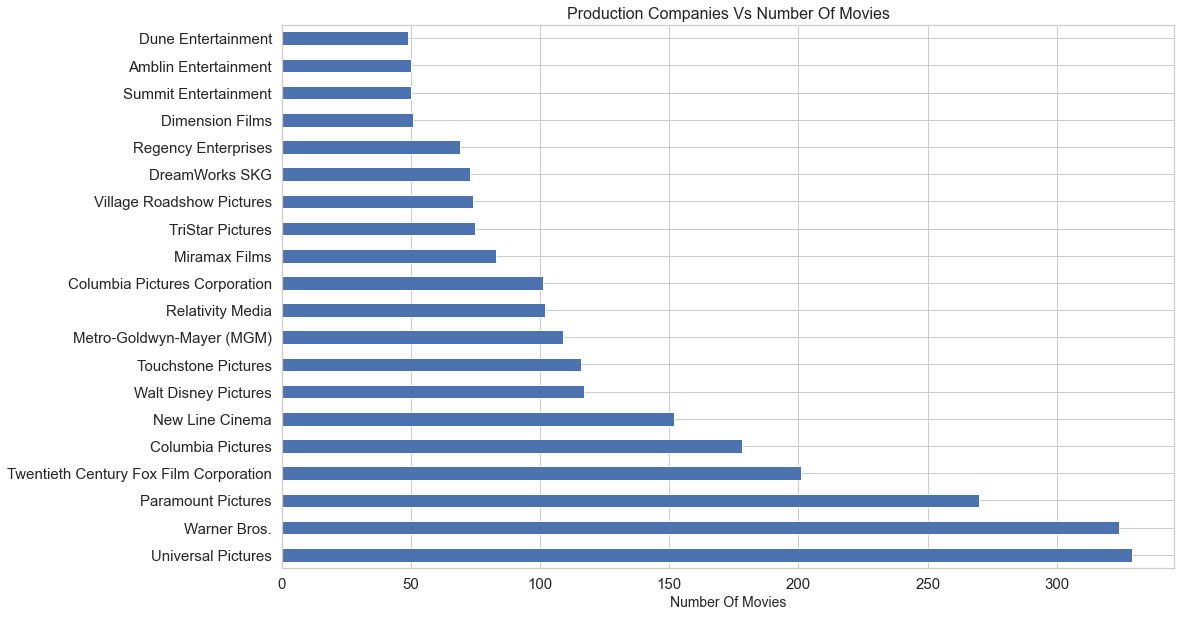

In [45]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.
production_companies = count_genre('production_companies')

#plot he barh plot.
production_companies.iloc[:20].plot(kind='barh',figsize=(16,10),fontsize=15)
plt.title("Production Companies Vs Number Of Movies",fontsize=16)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

### Research Question 13: Life Time Profit Earn By Each Production Company

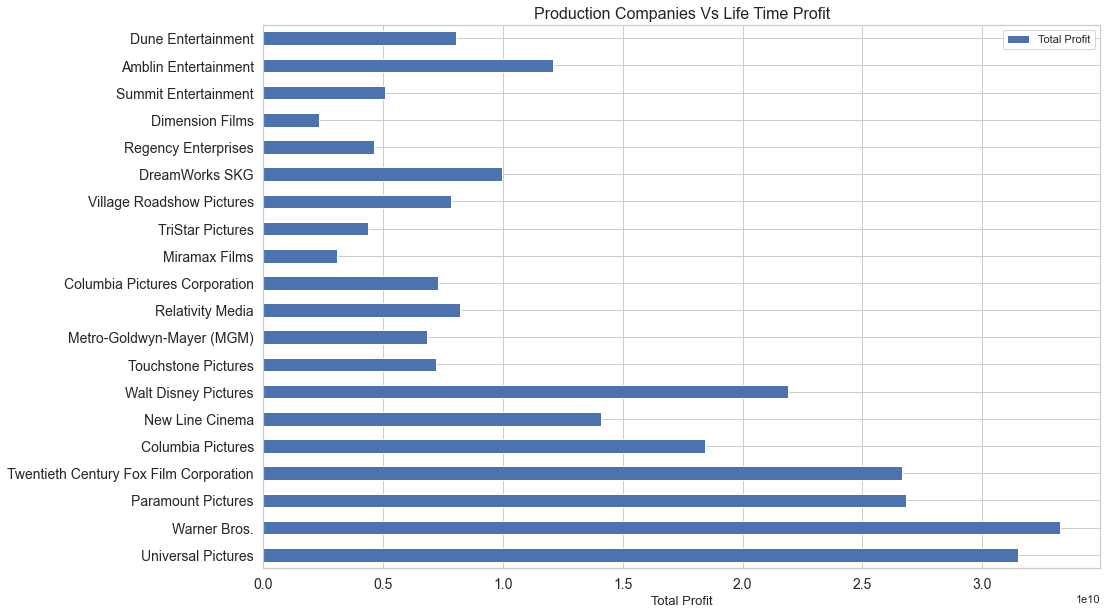

In [47]:
##map all the rows of production_companies in a list.
data1 = list(map(str,(tmdb_df['production_companies'])))
production_companies = pd.DataFrame(production_companies)

#make the list of profit and production_companies which contain all the rows of profit and production_companies column. 
data3 = list(production_companies.index.values)
#append the nan in the data3 because production_companies row has null values also.
data3.append('nan')
tmdb_df['Profit'] = tmdb_df['Profit'].replace(np.NAN,0)
profit = np.array(tmdb_df['Profit'])

#make a null dataframe which indexs are genres and has only one column Total Profit.
companies_df = pd.DataFrame(index = data3 ,columns =np.arange(0,1,1) )
#change all the values of the dataframe from NAN to zero.
companies_df = companies_df.fillna(value = 0.0)
z = 0
for i in data1:
    split_companies = list(map(str,i.split('|')))
    companies_df.loc[split_companies] = companies_df.loc[split_companies] + profit[z]
    z+=1

    #Rename the column name 
companies_df = companies_df.rename(columns={0:'Total Profit'})
#plot the barh plot
companies_df[:20].plot.barh(figsize=(15,10),fontsize=14,legend=True)
plt.title("Production Companies Vs Life Time Profit",fontsize=16)
plt.xlabel('Total Profit',fontsize=13)
sns.set_style("whitegrid")

### Research Question 14 : Top 20 Director Who Directs Maximum Movies?

In [48]:
#variable to store the returned value
count = data('director')
#printing top 5 values
count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ron Howard          10
dtype: int64

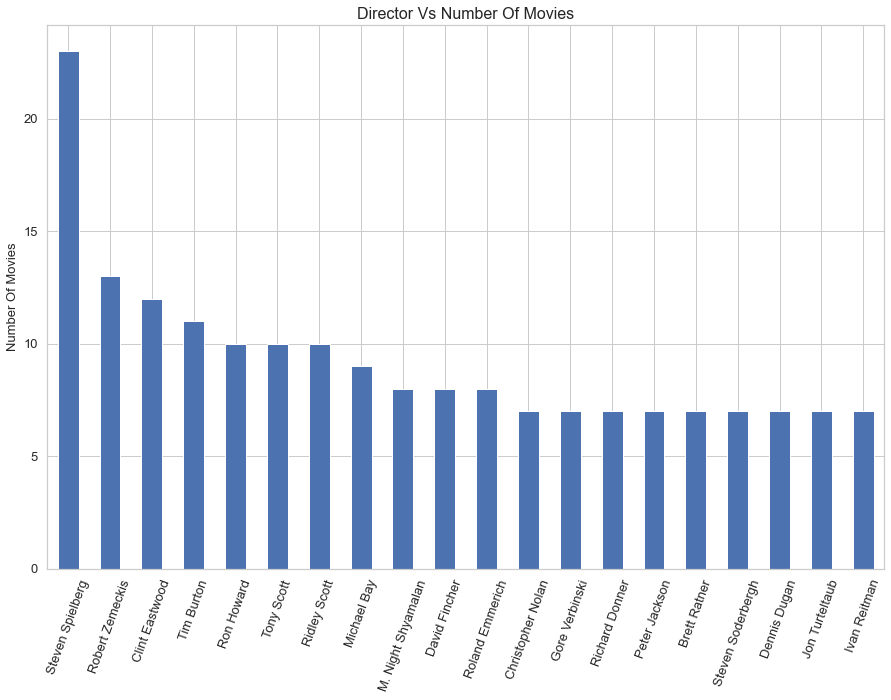

In [49]:
#plot a Bar graph to visualise
count.iloc[:20].plot(kind='bar',figsize=(15,10),fontsize=13)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=16)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions
> This is a really interesting data analysis! Discovered good facts about movies. After this analysis we can conclude:
>
> **For a Movie to be successful this is the criteria**
> 1. Average Budget must be around 60 millon dollar
     >>For Overall Good Production and Quality of the movie
> 2. Average duration of the movie must be 113 minutes
     >>To Keep the Viewers thoroughly engaged with the movie
> 3. Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
     >>Due to their  Good acting Skills, Experience over the years, and a good solid fanbase to attract people to watch the movie
> 4. Genre must be : Action, Adventure, Thriller, Comedy, Drama
     >>These are the trending genres overtime that people are most interested in
> 5. Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other      production companies
     >>Movies should be produced by this companies because of their high production of successful movies overtime and for a more stable assurance of profit for your movie
> 6. For Good Output of the movie,the directors should be:Steven Spielberg,Robert Zemeckis,Clint Eastwood,Tim Burton,Ron Howard Due to their vast experience in the field,the Artistic Talent and Creativity They put into interpreting the message of the movie
>
> By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollars!
>
>**Limitations: **This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis. 
>
>It's not 100 percent guaranteed that this formula is going to work, But it shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influential factor that would lead to different results, there are many that have to be taken care of.
During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.
